# Projeto de Análise de Dados - Estudo do Perfil dos Clientes Banco

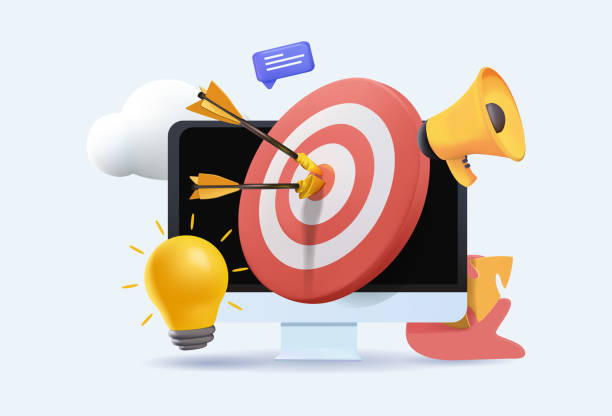

## 1. Contextualização

Com a finalidade de entender melhor o perfil dos clientes para potencializar a venda de um produto de investimento, a área de marketing criou uma campanha selecionando alguns clientes para realizar a oferta. A duração da campanha foi de 3 meses e abrangeu todo o Brasil. 

Finalizada a campanha, o marketing disponibilizou a base de dados bank_marketing.xlsx e solicitou uma análise do perfil dos clientes à área de Analytics. A expectativa é que esse estudo forneça informações suficientes para que as próximas campanhas sejam direcionadas para o público mais propenso a comprar o produto de investimento.

Sua missão, como Analista de Dados, é responder a seguinte pergunta de negócios: Qual é o perfil dos nossos clientes? Para responder de forma adequada, você deve:

1- Realizar uma Análise Exploratória buscando por insights sobre a venda dos títulos, o perfil dos clientes: Idade, Profissão, Estado Civil, Formação, Situação de Crédito e sobre a utilização de outros produtos: Hipoteca e Empréstimo.

2- Construir um relatório que embase com dados os insights encontrados, e traduza termos mais técnicos para a linguagem de negócios.

## 2. Pacotes e bibliotecas

In [5]:
import pandas as pd
import helper
import openpyxl

## 3. Carga dos dados

In [14]:
df_raw = pd.read_excel(r'data\bank_marketing.xlsx', sheet_name='bank_marketing', header=1)
df_raw = df_raw.drop(columns='Unnamed: 0')
df_raw.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1


## 4. Descrição dos dados

Feature | Descrição | Tipo
------- | --------- | ----
Cliente_Comprou_o_Titulo? | Sim / Não | Qualitativa Nominal
Idade | Quantitativa Discreta | Idade do cliente
Profissão | Profissão do cliente | Qualitativa Nominal
Estado_Civil | Estado civil do cliente | Qualitativa Ordinal
Formação | Formação acadêmica do cliente | Qualitativa Ordinal
Cliente_Devedor? | Sim / Não | Qualitativa Nominal
Saldo_Conta_Corrente | Saldo da conta corrente do cliente | Quantitativa Contínua
Tem_Hipoteca? | Sim / Não | Qualitativa Nominal
Tem_Emprestimo? | Sim / Não | Qualitativa Nominal
Qte_de_Ligações_Feitas | Número de ligações realizadas ao cliente | Quantitativa Discreta

In [17]:
df_raw.dtypes

Cliente_Comprou_o_Titulo?     object
Idade                          int64
Profissão                     object
Estado_Civil                  object
Formação                      object
Cliente_Devedor?              object
Saldo_Conta_Corrente         float64
Tem_Hipoteca?                 object
Tem_Emprestimo?               object
Qte_de_Ligações_Feitas         int64
dtype: object

In [16]:
df_raw['Saldo_Conta_Corrente'] = df_raw['Saldo_Conta_Corrente'].astype('float64')

In [18]:
df_raw.shape

(9684, 10)

In [19]:
df_raw.isna().sum()

Cliente_Comprou_o_Titulo?    0
Idade                        0
Profissão                    0
Estado_Civil                 0
Formação                     0
Cliente_Devedor?             0
Saldo_Conta_Corrente         0
Tem_Hipoteca?                0
Tem_Emprestimo?              0
Qte_de_Ligações_Feitas       0
dtype: int64

In [21]:
df_raw.duplicated().sum()

278

In [22]:
df_raw.drop_duplicates(inplace=True)
df_raw.duplicated().sum()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,Não,33,Operário,Casado,Ensino Médio,Não,263.0,Sim,Não,3
1,Não,58,Aposentado,Casado,Ensino Médio,Não,19.0,Não,Sim,3
2,Sim,83,Aposentado,Casado,Fundamental,Não,425.0,Não,Não,1
3,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281.0,Não,Não,1
4,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360.0,Sim,Não,1
...,...,...,...,...,...,...,...,...,...,...
9679,Não,30,Desempregado,Solteiro,Ensino Superior,Não,463.0,Não,Não,4
9680,Sim,57,Aposentado,Casado,Ensino Médio,Não,466.0,Não,Não,2
9681,Sim,39,Administrador,Solteiro,Ensino Superior,Não,307.0,Não,Não,2
9682,Sim,37,Técnico,Solteiro,Ensino Médio,Não,4.0,Não,Não,1


## 5. Resumo dos dados